# Preface
If you are new to Colab, please familiarize yourself with it by starting with the introduction (https://colab.research.google.com/notebooks/intro.ipynb) and then working yourself through a small tutorial:
https://colab.research.google.com/drive/1umhPVtUWH8yHD2l9A_G4fdttmgmSgC0Q

Please, always save a copy of the notebook on your google drive before you start working and only edit that one. In addition, always switch the runtime to python 3 and for most exercises it is recommended to switch also to a GPU runtime.

# Exercise 1 - Machine Learning Basics

In the first part of this exercise we will will apply linear regression to a dataset of brain properties. In the second part we will apply logistic regression to classify different types of iris flowers.

This exercise is based on https://github.com/rasbt/pydata-chicago2016-ml-tutorial

Before we start we need to download the two datasets named "dataset_brain.txt" and "dataset_iris.txt" from a shared google drive to the virtual machine of colab or our local machine so we will have it available:

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1W7s11mAK3PByOJIxPRpr1cIGhxsriI4c'
output = 'dataset_brain.txt'
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1lBQ55AHVbX29bEMNfLOunOE5PwYAKDpg'
output = 'dataset_iris.txt'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1W7s11mAK3PByOJIxPRpr1cIGhxsriI4c
To: /content/dataset_brain.txt
100%|██████████| 8.34k/8.34k [00:00<00:00, 9.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lBQ55AHVbX29bEMNfLOunOE5PwYAKDpg
To: /content/dataset_iris.txt
100%|██████████| 7.78k/7.78k [00:00<00:00, 20.7MB/s]


'dataset_iris.txt'

In [ ]:
!ls

dataset_brain.txt  dataset_iris.txt  sample_data


# Table of Contents

* [1 Linear Regression](#2-Linear-Regression)
    * [Loading the dataset](#Loading-the-dataset)
    * [Preparing the dataset](#Preparing-the-dataset)
    * [Fitting the model](#Fitting-the-model)
    * [Evaluating the model](#Evaluating-the-model)
* [2 Classification](#3-Introduction-to-Classification)
    * [The Iris dataset](#The-Iris-dataset)
    * [Class label encoding](#Class-label-encoding)
    * [Scikit-learn's in-build datasets](#Scikit-learn's-in-build-datasets)
    * [Test/train splits](#Test/train-splits)
    * [Logistic Regression](#Logistic-Regression)
    * [K-Nearest Neighbors](#K-Nearest-Neighbors)

# 1  Linear Regression

## Loading the dataset

We will use a dataset of an old publication which studied the relation of the brain weight to the head size for different gender and age ranges.

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

The dataset is stored in a file called
**`dataset_brain.txt`**

Description: Brain weight (grams) and head size (cubic cm) for 237 adults classified by gender and age group.

Variables/Columns
- Gender (1=Male, 2=Female)
- Age Range (1=20-46, 2=46+)
- Head size (cm^3)
- Brain weight (grams)


### Task 1: Print the first 30 lines of the dataset
*hints*
- use open(path/to/file)
- readlines is a useful method

In [ ]:
with open("dataset_brain.txt") as ds_brain:
    firstNlines=ds_brain.readlines()[0:30]

for line in firstNlines:
    print(line)

# Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 

# to the Size of the Head", Biometrika, Vol. 4, pp105-123

#

# Download link: http://www.stat.ufl.edu/~winner/data/brainhead.txt

#

# Description: Brain weight (grams) and head size (cubic cm) for 237

# adults classified by gender and age group.

#

# Variables/Columns

# Gender   8   /* 1=Male, 2=Female  */

# Age Range  16   /* 1=20-46, 2=46+  */

# Head size (cm^3)  21-24

# Brain weight (grams)  29-32

#

gender age-group head-size brain-weight

       1       1    4512    1530

       1       1    3738    1297

       1       1    4261    1335

       1       1    3777    1282

       1       1    4177    1590

       1       1    3585    1300

       1       1    3785    1400

       1       1    3559    1255

       1       1    3613    1355

       1       1    3982    1375

       1       1    3443    1340

       1       1    3993    1380

       1       1    3640    1355

       1       1    4208

We will use **`pandas`** to read in the dataset.

https://pandas.pydata.org/pandas-docs/stable/

'pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.' (quoted from web page)


In [ ]:
import pandas as pd

The file contains 'comma separated values' (CSV) and we will use pandas **`DataFrame`** to handle the data.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame

In [ ]:
df = pd.read_csv('dataset_brain.txt',
                 encoding='utf-8',
                 comment='#',
                 sep='\s+')
df.head(10)

,gender,age-group,head-size,brain-weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


from matplotlib import pyplot as plt
_df_0['head-size'].plot(kind='hist', bins=20, title='head-size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['brain-weight'].plot(kind='hist', bins=20, title='brain-weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='head-size', y='brain-weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['gender']
  ys = series['head-size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('gender')
_ = plt.ylabel('head-size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['gender']
  ys = series['brain-weight']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('gender')
_ = plt.ylabel('brain-weight')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['gender']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'gender'}, axis=1)
              .sort_values('gender', ascending=True))
  xs = counted['gender']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('gender')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['age-group']
  ys = series['head-size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('age-group', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('age-group')
_ = plt.ylabel('head-size')

from matplotlib import pyplot as plt
_df_7['head-size'].plot(kind='line', figsize=(8, 4), title='head-size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['brain-weight'].plot(kind='line', figsize=(8, 4), title='brain-weight')
plt.gca().spines[['top', 'right']].set_visible(False)

*additional comments:*

The cell above reads a text file with csv ending from the disk and converts it to a data frame. The parameter *comment* specifies which lines in the file will not be converted to data entries, *sep* specifies how data entries are separated. '\s+' is a regular expression that matches one or more blanks or tabs between data entries. *sep* needs to be chosen according to your data format and could be other regular expressions or separating characters  like ';', '\t' (tab only), ....

Let's look at the relation of the brain weight to the head size by plotting them in a 2D scatter plot. We will use **`matplotlib`** for that.

https://matplotlib.org/



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

We can call the columns of the pandas DataFrame simply by using the keys.

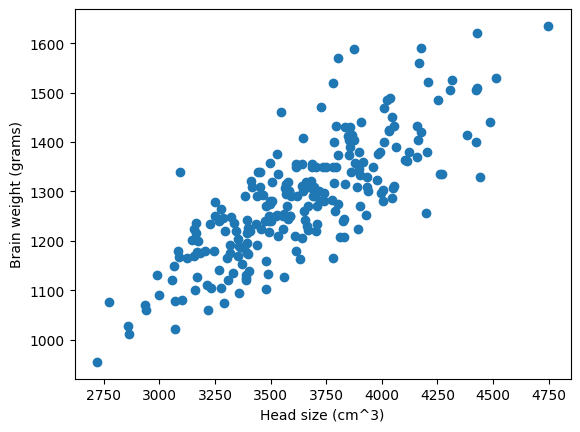

In [ ]:
plt.scatter(df['head-size'], df['brain-weight'])
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

## Preparing the dataset

In order to use the dataset, we need to retrieve a numpy array containing only the values.

http://www.numpy.org/

In [ ]:
import numpy as np

In [ ]:
y = df['brain-weight'].values
print(y)

[1530 1297 1335 1282 1590 1300 1400 1255 1355 1375 1340 1380 1355 1522
 1208 1405 1358 1292 1340 1400 1357 1287 1275 1270 1635 1505 1490 1485
 1310 1420 1318 1432 1364 1405 1432 1207 1375 1350 1236 1250 1350 1320
 1525 1570 1340 1422 1506 1215 1311 1300 1224 1350 1335 1390 1400 1225
 1310 1560 1330 1222 1415 1175 1330 1485 1470 1135 1310 1154 1510 1415
 1468 1390 1380 1432 1240 1195 1225 1188 1252 1315 1245 1430 1279 1245
 1309 1412 1120 1220 1280 1440 1370 1192 1230 1346 1290 1165 1240 1132
 1242 1270 1218 1430 1588 1320 1290 1260 1425 1226 1360 1620 1310 1250
 1295 1290 1290 1275 1250 1270 1362 1300 1173 1256 1440 1180 1306 1350
 1125 1165 1312 1300 1270 1335 1450 1310 1027 1235 1260 1165 1080 1127
 1270 1252 1200 1290 1334 1380 1140 1243 1340 1168 1322 1249 1321 1192
 1373 1170 1265 1235 1302 1241 1078 1520 1460 1075 1280 1180 1250 1190
 1374 1306 1202 1240 1316 1280 1350 1180 1210 1127 1324 1210 1290 1100
 1280 1175 1160 1205 1163 1022 1243 1350 1237 1204 1090 1355 1250 1076
 1120 

How many data points do we have?

In [ ]:
y.shape

(237,)

The same with the head size:

In [ ]:
X = df['head-size'].values
print(X)
X.shape

[4512 3738 4261 3777 4177 3585 3785 3559 3613 3982 3443 3993 3640 4208
 3832 3876 3497 3466 3095 4424 3878 4046 3804 3710 4747 4423 4036 4022
 3454 4175 3787 3796 4103 4161 4158 3814 3527 3748 3334 3492 3962 3505
 4315 3804 3863 4034 4308 3165 3641 3644 3891 3793 4270 4063 4012 3458
 3890 4166 3935 3669 3866 3393 4442 4253 3727 3329 3415 3372 4430 4381
 4008 3858 4121 4057 3824 3394 3558 3362 3930 3835 3830 3856 3249 3577
 3933 3850 3309 3406 3506 3907 4160 3318 3662 3899 3700 3779 3473 3490
 3654 3478 3495 3834 3876 3661 3618 3648 4032 3399 3916 4430 3695 3524
 3571 3594 3383 3499 3589 3900 4114 3937 3399 4200 4488 3614 4051 3782
 3391 3124 4053 3582 3666 3532 4046 3667 2857 3436 3791 3302 3104 3171
 3572 3530 3175 3438 3903 3899 3401 3267 3451 3090 3413 3323 3680 3439
 3853 3156 3279 3707 4006 3269 3071 3779 3548 3292 3497 3082 3248 3358
 3803 3566 3145 3503 3571 3724 3615 3203 3609 3561 3979 3533 3689 3158
 4005 3181 3479 3642 3632 3069 3394 3703 3165 3354 3000 3687 3556 2773
 3058 

(237,)

In all machine learning frameworks like scikit-learn, tensorflow, keras, ..., it is a convention that the first data dimension depicts the number of samples, the second one the number of features. Our array has currently only one dimension. We have 237 samples, each containing only one feature value. To comply with the convention, we would like to have n arrays containing one value:

In [ ]:
X = X[:, None]
print(X)

[[4512]
 [3738]
 [4261]
 [3777]
 [4177]
 [3585]
 [3785]
 [3559]
 [3613]
 [3982]
 [3443]
 [3993]
 [3640]
 [4208]
 [3832]
 [3876]
 [3497]
 [3466]
 [3095]
 [4424]
 [3878]
 [4046]
 [3804]
 [3710]
 [4747]
 [4423]
 [4036]
 [4022]
 [3454]
 [4175]
 [3787]
 [3796]
 [4103]
 [4161]
 [4158]
 [3814]
 [3527]
 [3748]
 [3334]
 [3492]
 [3962]
 [3505]
 [4315]
 [3804]
 [3863]
 [4034]
 [4308]
 [3165]
 [3641]
 [3644]
 [3891]
 [3793]
 [4270]
 [4063]
 [4012]
 [3458]
 [3890]
 [4166]
 [3935]
 [3669]
 [3866]
 [3393]
 [4442]
 [4253]
 [3727]
 [3329]
 [3415]
 [3372]
 [4430]
 [4381]
 [4008]
 [3858]
 [4121]
 [4057]
 [3824]
 [3394]
 [3558]
 [3362]
 [3930]
 [3835]
 [3830]
 [3856]
 [3249]
 [3577]
 [3933]
 [3850]
 [3309]
 [3406]
 [3506]
 [3907]
 [4160]
 [3318]
 [3662]
 [3899]
 [3700]
 [3779]
 [3473]
 [3490]
 [3654]
 [3478]
 [3495]
 [3834]
 [3876]
 [3661]
 [3618]
 [3648]
 [4032]
 [3399]
 [3916]
 [4430]
 [3695]
 [3524]
 [3571]
 [3594]
 [3383]
 [3499]
 [3589]
 [3900]
 [4114]
 [3937]
 [3399]
 [4200]
 [4488]
 [3614]
 [4051]


Alternatively you can use `X = X.reshape(len(X), 1)`
or `X = X.reshape(-1, 1)` if you know that you have only one feature, but you are not sure how many values you have. Each *reshape* call can have up to one *-1* in it. This axis will then be determined by the other entries.


We will use the machine learning tool and library **`scikit-learn`** in the following.

http://scikit-learn.org/stable/


A very useful functionality of scikit learn is to easily split the dataset into training and testing dataset. The dataset is split randomly with seed 123 and the test size is 30%, train size 70%:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123)

*additional comments:*

 using a seed for randomization results in getting the same random numbers for each call. In this example, we would always get the same test-train-split. This may seem like a mistake at first but is surprisingly useful for **testing your code** as you know that changes in the result do not come from a different randomization*.

### Task 2: Plot the training and testing dataset separately again in a 2D scatter plot including axis label. Use different colors (option c(olor)='blue') and different marker (option marker='o')

https://matplotlib.org/api/colors_api.html

https://matplotlib.org/api/markers_api.html

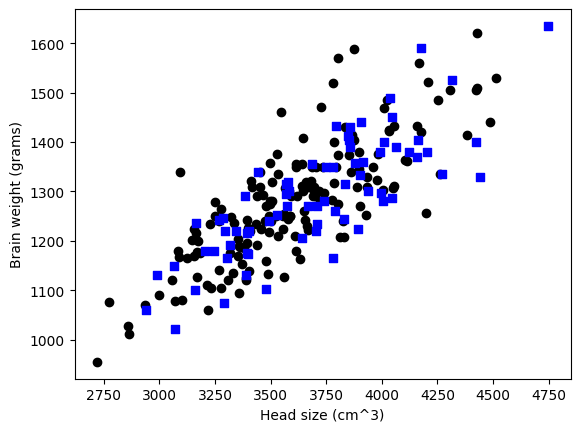

In [ ]:
plt.scatter(X_train, y_train, c='black', marker='o')
plt.scatter(X_test, y_test, c='blue', marker='s')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

## Fitting the model

We would like to fit the training data now using the LinearRegression model of scikit-learn:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Which uses a linear function and the ordinary least squares method.

*comment: yes, this is pretty much the same as using curve_fit from scipy with a linear fit function like you did in the good old lab excercise days*

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

OK, what is the result of the fit?

In [ ]:
# The coefficients
print('Coefficients: \n', lr.coef_)
# The intercept
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [0.271117]
Intercept: 
 302.0303319608811


OK, let's plot this linear function.

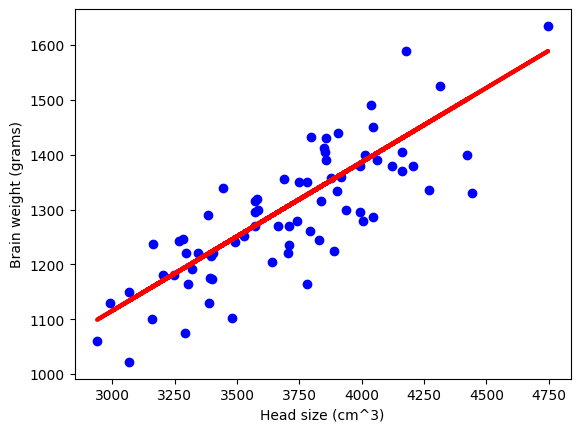

In [ ]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

## Evaluating the model

How do we know if the fit was good? We need to define a performance measure. One way is to calculate the **Coefficient of determination**, denoted R^2. It is the proportion of the variance in the dependent variable that is predictable from the independent variables. It is calculated the following way:

 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/eef0fc7006ba5f7df32eceeba7f1c5271e0100af">

In [ ]:
sum_of_squares = ((y_test - y_pred) ** 2).sum()
res_sum_of_squares = ((y_test - y_test.mean()) ** 2).sum()
r2_score = 1 - (sum_of_squares / res_sum_of_squares)
print('R2 score: %.2f' % r2_score)

R2 score: 0.63


It ranges from 0 to 1 and values close to 1 means a good agreement. Luckily, scikit-learn has several performance measures for regression (metrics) already included:

http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean squared error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))


Coefficient of determination: 0.63
Mean squared error: 5068.22
Mean absolute error: 57.08


# 2 Classification

## The Iris dataset

### Task 3: The Iris flower dataset is stored in file **`dataset_iris.txt`**. Read in the dataset using a pandas DatafFrame and have a look at the first entries.
*hints*:
- look what you did for the first data innspection in Task 1
- what is the separator in the iris dataset?

In [ ]:
with open("dataset_iris.txt") as ds_brain:
    firstNlines=ds_brain.readlines()[0:100] #put here the interval you want

for line in firstNlines:
    print(line)

# Download source: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

#

# 1. Title: Iris Plants Database

#	Updated Sept 21 by C.Blake - Added discrepency information

#

# 2. Sources:

#     (a) Creator: R.A. Fisher

#     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)

#     (c) Date: July, 1988

#

# 3. Past Usage:

#   - Publications: too many to mention!!!  Here are a few.

#   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"

#      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions

#      to Mathematical Statistics" (John Wiley, NY, 1950).

#   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.

#      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.

#   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System

#      Structure and Classification Rule for Recognition in Partially Exposed

#      Environments".  IEEE Transactions on Pattern Analys

In [ ]:
df = pd.read_csv('dataset_iris.txt',
                 encoding='utf-8',
                 comment='#',
                 sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We now need to create a 150x4 design matrix containing only our feature values. In order to do that, we need to strip the class column from the dataset. We use the **`iloc`** function for that:

`DataFrame.iloc
Purely integer-location based indexing for selection by position.`

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html

In [ ]:
X = df.iloc[:, :4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


And now we get 150x4 numpy array (design matrix) by using the values function:

In [ ]:
X = X.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

However, we also need a numpy array containing the class labels in order to classify. Let's get the class column and create a numpy array out of it:

In [ ]:
y = df['class'].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

We could also just inspect the targets by only looking at unique values:

In [ ]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Class label encoding

We will now use the **`LabelEncoder`** class to convert the class labels into numerical labels:

In [ ]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(y)
l_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Simply, by using **`transform`**, we can convert it into numerical targets

In [ ]:
y_enc = l_encoder.transform(y)
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Or just the unique values:

In [ ]:
np.unique(y_enc)

array([0, 1, 2])

We can also convert it back by using **`inverse_transform`**:

In [ ]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Scikit-learn's in-build datasets

Scikit-learn has also a couple of in-build datasets:

http://scikit-learn.org/stable/datasets/index.html

The iris dataset is part of it, which you can simply load:

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We get the feature design matrix by calling data:

In [ ]:
 iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

And the target array:

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Test/train splits

OK, now we need to split the dataset again in training and testing. Let's first assign the design matrix to X and the target to y:

In [ ]:
X, y = iris.data[:, :2], iris.target
# ! We only use 2 features for visual purposes


How many example do we have of each class?

In [ ]:
print('Class labels:', np.unique(y))
print('Class proportions:', np.bincount(y))

Class labels: [0 1 2]
Class proportions: [50 50 50]


### Task 4: Split the dataset in 40% testing and 60% training sets.
- How many examples of each class do you expect in the training set?
- How many are there? What happened?
- What happens if you don't shuffle?
- Can you create datasets in which each class is equally distributed?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42)

print('Class labels:', np.unique(y_train))
print('Class proportions:', np.bincount(y_train))

Class labels: [0 1 2]
Class proportions: [27 31 32]


By default, the dataset is shuffled. What happens if we don't shuffle?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42, shuffle=False)

print('Class labels:', np.unique(y_train))
print('Class proportions:', np.bincount(y_train))

Class labels: [0 1]
Class proportions: [50 40]


OK, we want to shuffle, but we want equal portions of each class. We can achieve that by using the `stratify` option:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42,
        stratify=y)

print('Class labels:', np.unique(y_train))
print('Class proportions:', np.bincount(y_train))

Class labels: [0 1 2]
Class proportions: [30 30 30]


### Task 5: Plot the sepal length vs the sepal width of the training set for the different classes in a scatter plot. You can set different colors for the classes with `c=y_train`

Text(0, 0.5, 'Sepal width')

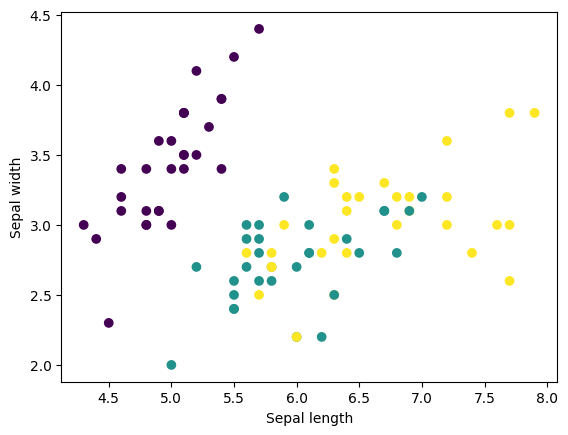

In [ ]:
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


## Logistic Regression

Let's perform a classification using logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg',
                        multi_class='multinomial',
                        random_state=42)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

OK, how do we evaluate the classification? We can chose one of the classification performance measures:

http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print("Precision: %.2f" % precision_score(y_test, y_pred, average='weighted'))
print("Recall: %.2f" % recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.78
Precision: 0.78
Recall: 0.78


Or we use the classification report function:

In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.67      0.70      0.68        20
           2       0.68      0.65      0.67        20

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



Finally, we would like to plot the decision regions and our data in order to see how the classifier categorized the events. We have highlighted the test data.

(Technicality) When running on Google Colab, we first need to update the *mlxtend* package, as Colab's default version of the packages is outdated:

In [ ]:
%pip install mlxtend --upgrade  #this needs to be run only once and will install the most recent version of the mlxtend package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


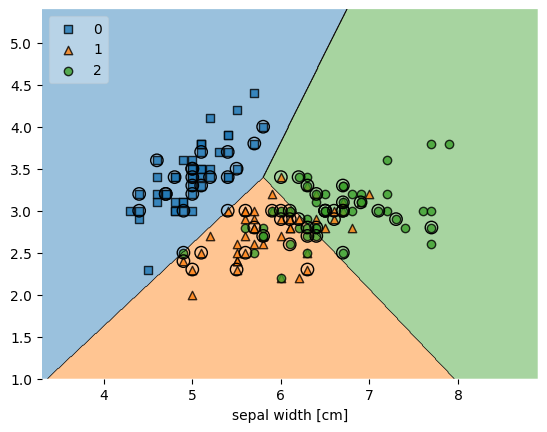

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, y=y, clf=lr, X_highlight=X_test, legend=2)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal width [cm]');

## K-Nearest Neighbors

### Task 6 (Bonus): Perform a classification using K-nearest neighbors classifier, evaluate the performance and show the decision regions.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Accuracy: 0.83
Precision: 0.83
Recall: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.76      0.80      0.78        20
           2       0.78      0.70      0.74        20

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



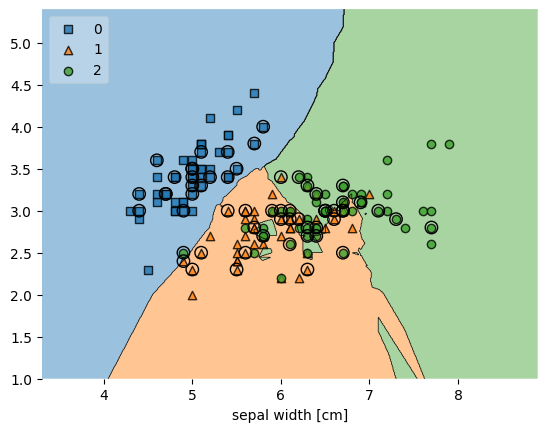

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)

kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print("Precision: %.2f" % precision_score(y_test, y_pred, average='weighted'))
print("Recall: %.2f" % recall_score(y_test, y_pred, average='weighted'))
print('Classification Report:\n', classification_report(y_test, y_pred))

plot_decision_regions(X=X, y=y, clf=kn, X_highlight=X_test, legend=2)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal width [cm]');